### 폐업 통계

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import koreanize_matplotlib

# 파일 경로 설정
file_paths = {
    "외식": "./외식별_가맹점_개폐업통계_2020_2024.csv",
    "서비스": "./서비스별_가맹점_개폐업통계_2020_2024.csv",
    "업종": "./업종별_가맹점_개폐업통계_2020_2024.csv"
}

dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}



In [3]:
# 세 데이터 행 단위로 합치기
def combine_dataframes(dfs):
    combined_df = pd.DataFrame()
    for name, df in dfs.items():
        # '업종' 열을 추가하여 데이터프레임에 업종 정보를 포함
        df['업종'] = name
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    return combined_df  

# 데이터프레임 결합
combined_df = combine_dataframes(dfs)   
# 결합된 데이터프레임의 열 이름 변경
combined_df.head()


,yr,indutyLclasNm,indutyMlsfcNm,allFrcsCnt,newFrcsRgsCnt,newFrcsRt,bfyrNewFrcsRt,bfyrVersusNewDffrncRt,endCncltnFrcsCnt,endCncltnRt,bfyrVersusEndCncltnRt,bfyrVersusDffrncRt,업종
0,2020,외식,치킨,25255,4194,16.61,15.60,1.00,2845,11.27,11.60,-0.33,외식
1,2020,외식,한식,24130,7095,29.40,24.60,4.80,3237,13.41,12.45,0.97,외식
2,2020,외식,기타 외식,16257,4440,27.31,23.79,3.52,2392,14.71,13.36,1.35,외식
3,2020,외식,커피,15770,3279,20.79,20.67,0.13,1356,8.60,10.90,-2.30,외식
4,2020,외식,분식,9281,2451,26.41,21.00,5.41,1045,11.26,10.51,0.75,외식


In [4]:
combined_df = combined_df.rename(columns={
    "yr": "기준연도",
    "indutyLclasNm": "업종대분류",
    "indutyMlsfcNm": "업종중분류",
    "allFrcsCnt": "전체가맹점수",
    "newFrcsRgsCnt": "신규가맹점등록수",
    "newFrcsRt": "신규가맹점등록률",
    "bfyrNewFrcsRt": "전년도신규가맹점등록률",
    "bfyrVersusNewDffrncRt": "전년대비신규등록률증감",
    "endCncltnFrcsCnt": "폐점수",
    "endCncltnRt": "폐점률",
    "bfyrVersusEndCncltnRt": "전년대비폐점률",
    "bfyrVersusDffrncRt": "전년대비순증감률"
})


In [5]:
combined_df.head()

,기준연도,업종대분류,업종중분류,전체가맹점수,신규가맹점등록수,신규가맹점등록률,전년도신규가맹점등록률,전년대비신규등록률증감,폐점수,폐점률,전년대비폐점률,전년대비순증감률,업종
0,2020,외식,치킨,25255,4194,16.61,15.60,1.00,2845,11.27,11.60,-0.33,외식
1,2020,외식,한식,24130,7095,29.40,24.60,4.80,3237,13.41,12.45,0.97,외식
2,2020,외식,기타 외식,16257,4440,27.31,23.79,3.52,2392,14.71,13.36,1.35,외식
3,2020,외식,커피,15770,3279,20.79,20.67,0.13,1356,8.60,10.90,-2.30,외식
4,2020,외식,분식,9281,2451,26.41,21.00,5.41,1045,11.26,10.51,0.75,외식


In [6]:
combined_df['업종중분류'].unique()

array(['치킨', '한식', '기타 외식', '커피', '분식', '교육 (외국어)', '교육 (교과)', '기타 교육',
       '자동차 관련', '세탁', '기타 서비스', '운송', '편의점', '기타도소매', '화장품', '(건강)식품',
       '종합소매점'], dtype=object)

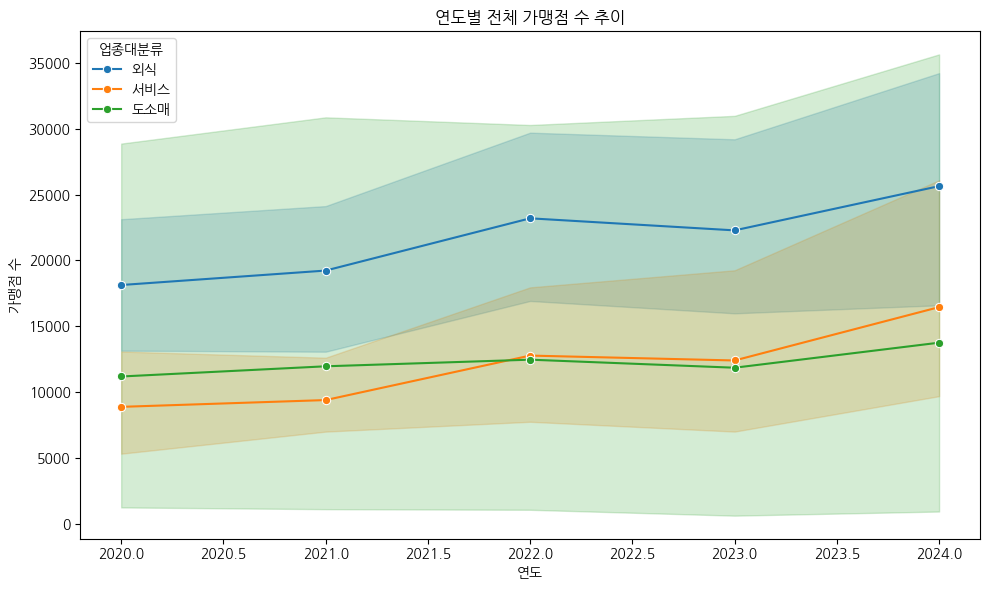

In [7]:
# 년도별

# 연도별 전체 가맹점 수 추이
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="기준연도", y="전체가맹점수", hue="업종대분류", marker="o")
plt.title("연도별 전체 가맹점 수 추이")
plt.ylabel("가맹점 수")
plt.xlabel("연도")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()

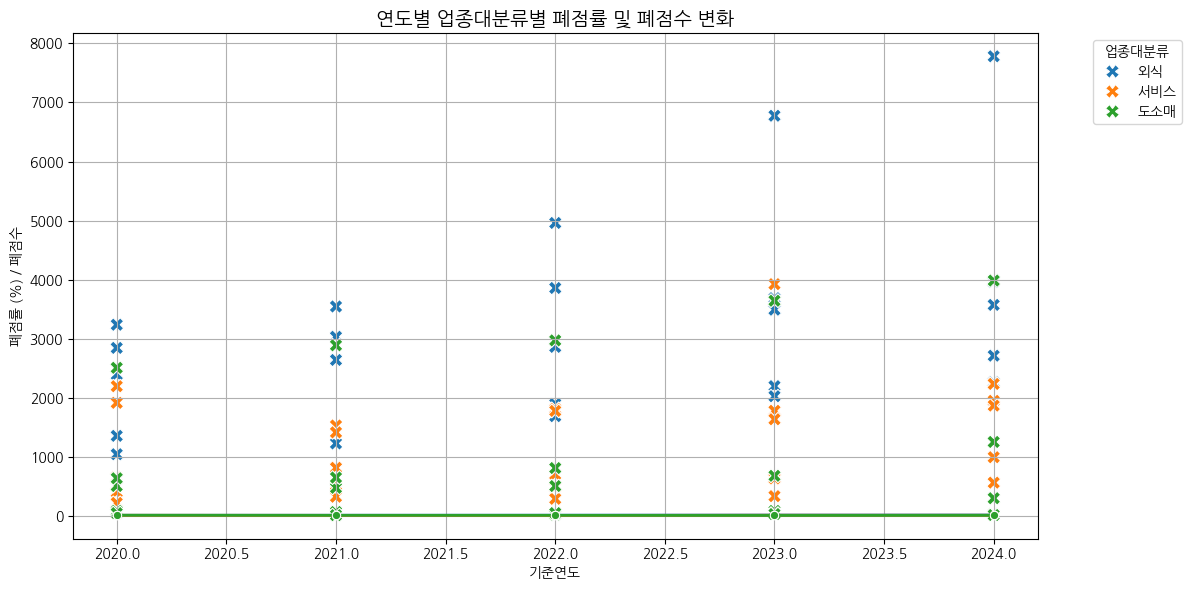

In [8]:


plt.figure(figsize=(12, 6))

# 폐점률 (Line Plot)
sns.lineplot(
    data=combined_df,
    x="기준연도",
    y="폐점률",
    hue="업종대분류",
    marker="o",
    linewidth=2,
    legend=False
)

# 폐점수 (Scatter Plot)
sns.scatterplot(
    data=combined_df,
    x="기준연도",
    y="폐점수",
    hue="업종대분류",
    marker="X",
    s=100,
    legend=True
)

plt.title("연도별 업종대분류별 폐점률 및 폐점수 변화", fontsize=14)
plt.xlabel("기준연도")
plt.ylabel("폐점률 (%) / 폐점수")
plt.legend(title="업종대분류", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


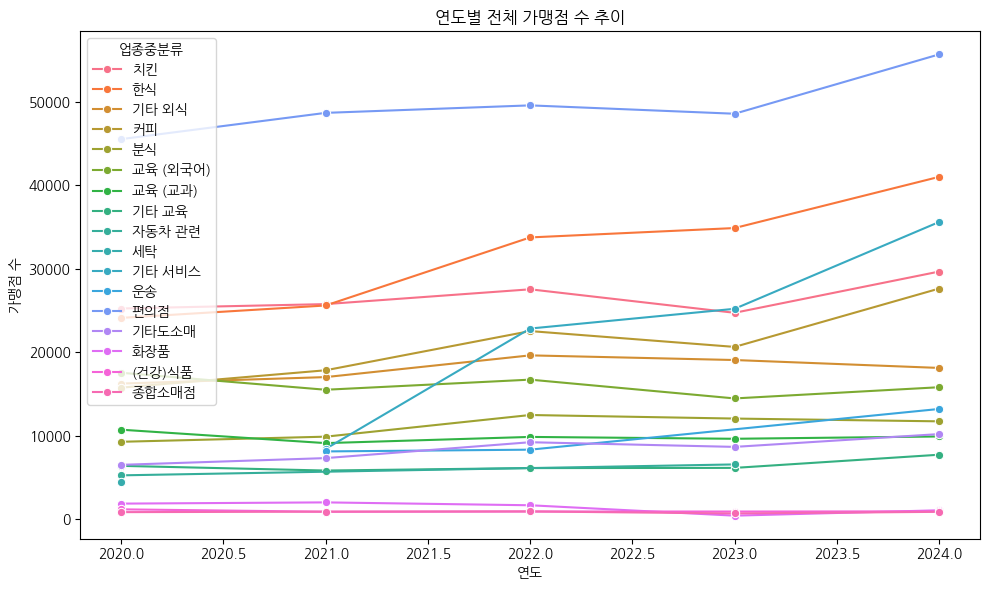

In [9]:
# 업종중분류

# 연도별 전체 가맹점 수 추이
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="기준연도", y="전체가맹점수", hue="업종중분류", marker="o")
plt.title("연도별 전체 가맹점 수 추이")
plt.ylabel("가맹점 수")
plt.xlabel("연도")
plt.legend(title="업종중분류")
plt.tight_layout()
plt.show()

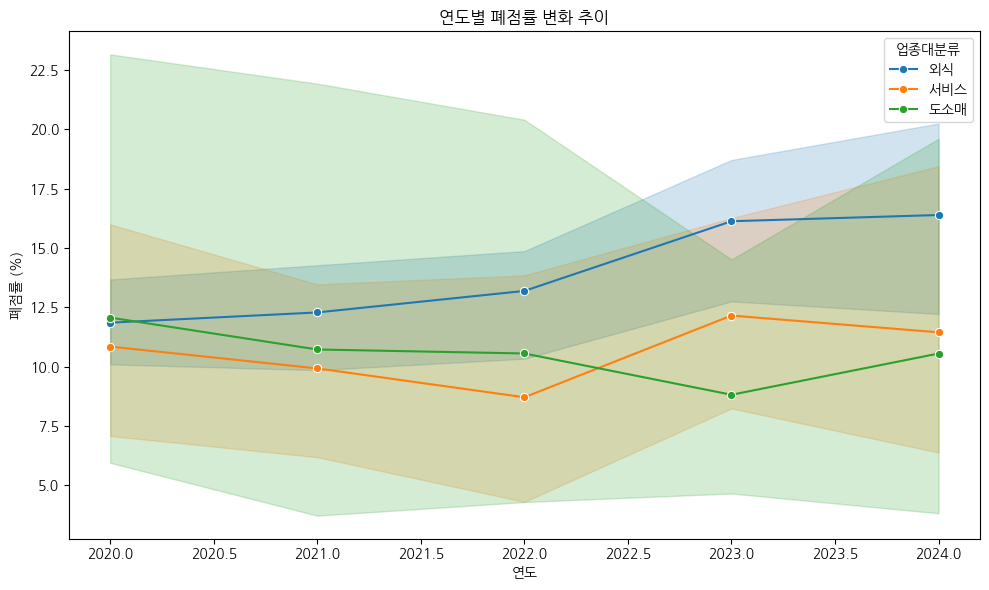

In [10]:
# 연도별 폐점률 추이
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="기준연도", y="폐점률", hue="업종대분류", marker="o")
plt.title("연도별 폐점률 변화 추이")
plt.ylabel("폐점률 (%)")
plt.xlabel("연도")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()

In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연도         75 non-null     int64  
 1   업종대분류        75 non-null     object 
 2   업종중분류        75 non-null     object 
 3   전체가맹점수       75 non-null     int64  
 4   신규가맹점등록수     75 non-null     int64  
 5   신규가맹점등록률     75 non-null     float64
 6   전년도신규가맹점등록률  75 non-null     float64
 7   전년대비신규등록률증감  75 non-null     float64
 8   폐점수          75 non-null     int64  
 9   폐점률          75 non-null     float64
 10  전년대비폐점률      75 non-null     float64
 11  전년대비순증감률     75 non-null     float64
 12  업종           75 non-null     object 
dtypes: float64(6), int64(4), object(3)
memory usage: 7.7+ KB


In [12]:
combined_df['업종'].unique()    
# 결

array(['외식', '서비스', '업종'], dtype=object)

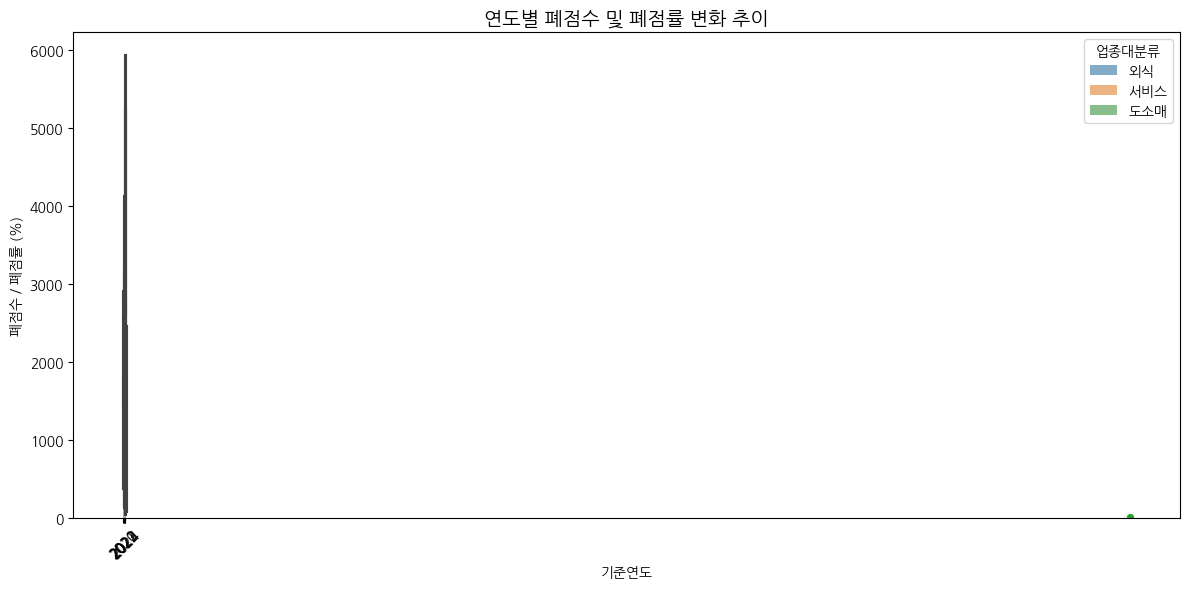

In [13]:
# 
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
# sns.set(style="whitegrid")

# 시각화 시작
plt.figure(figsize=(12, 6))

# 막대그래프 - 폐점수
sns.barplot(
    data=combined_df,
    x="기준연도",
    y="폐점수",
    hue="업종대분류",  # 또는 "업종"
    alpha=0.6,
    dodge=True
)

# 선그래프 - 폐점률
sns.lineplot(
    data=combined_df,
    x="기준연도",
    y="폐점률",
    hue="업종대분류",  # 또는 "업종"
    marker="o",
    linewidth=2,
    legend=False
)

plt.title("연도별 폐점수 및 폐점률 변화 추이", fontsize=14)
plt.ylabel("폐점수 / 폐점률 (%)")
plt.xlabel("기준연도")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


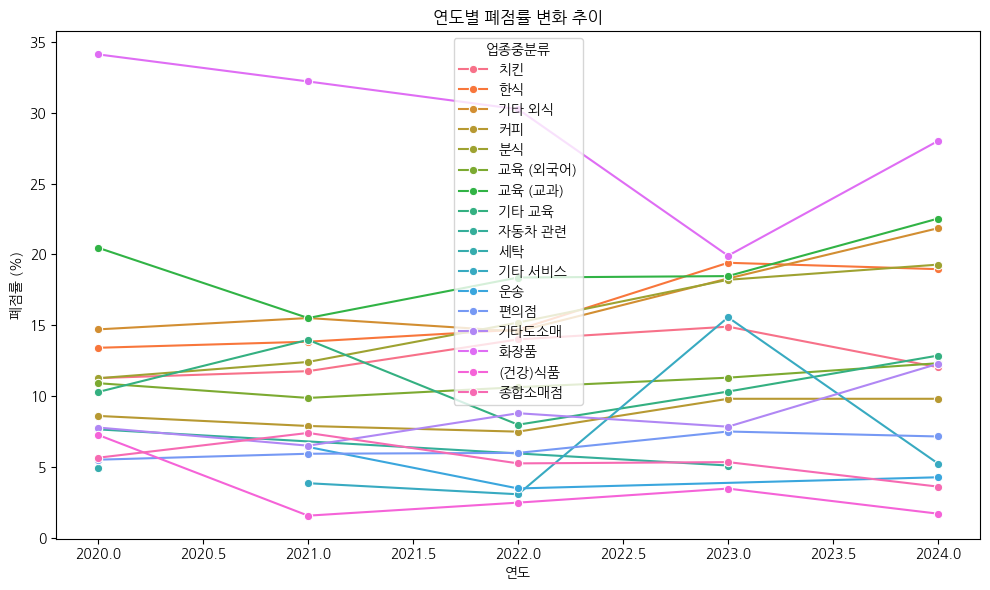

In [14]:
# 업종중분류    

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="기준연도", y="폐점률", hue="업종중분류", marker="o")
plt.title("연도별 폐점률 변화 추이")
plt.ylabel("폐점률 (%)")
plt.xlabel("연도")
plt.legend(title="업종중분류")
plt.tight_layout()
plt.show()

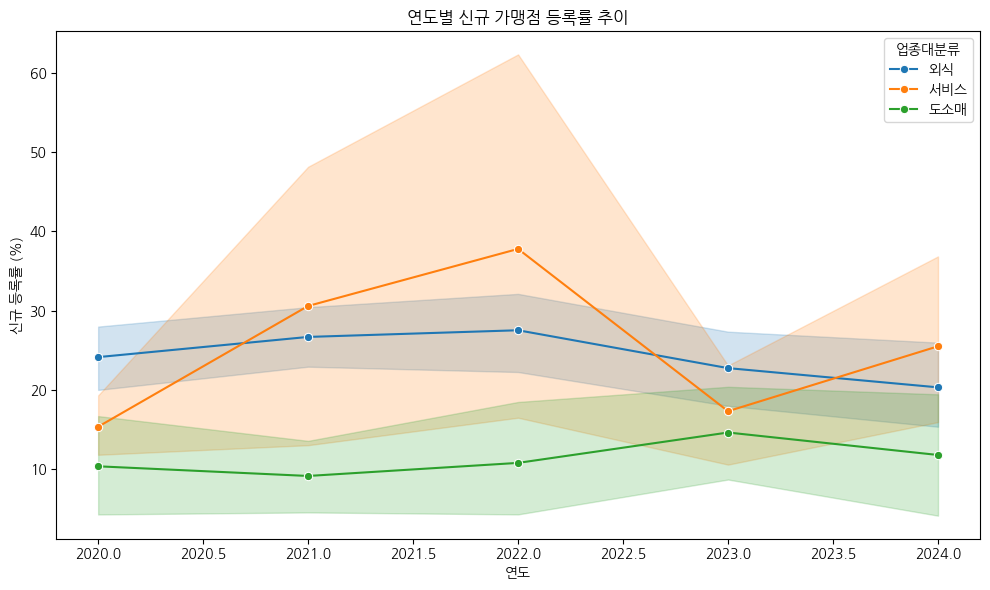

In [15]:
# 연도별 신규 가맹점 등록률 추이
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="기준연도", y="신규가맹점등록률", hue="업종대분류", marker="o")
plt.title("연도별 신규 가맹점 등록률 추이")
plt.ylabel("신규 등록률 (%)")
plt.xlabel("연도")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()

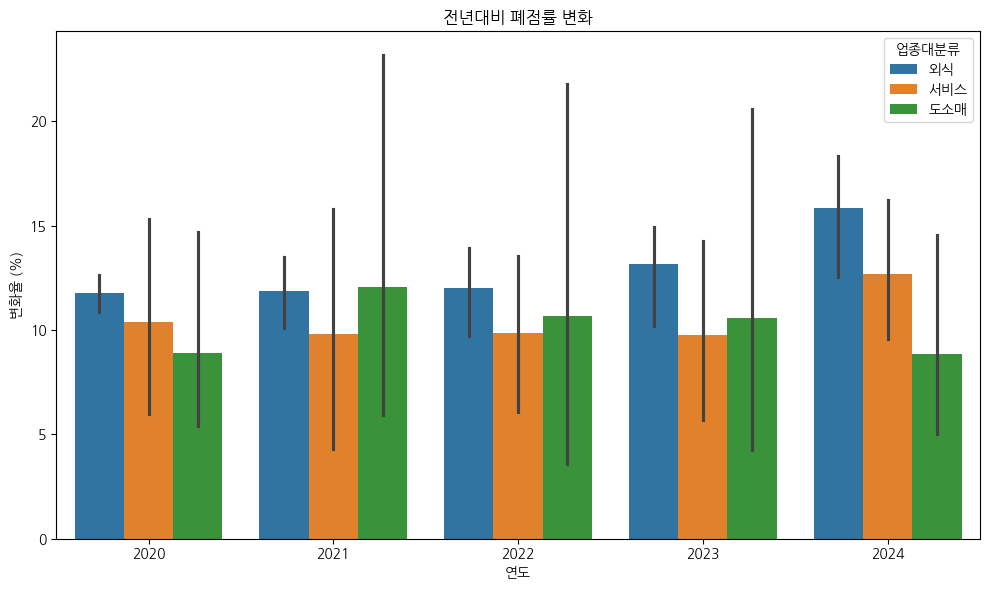

In [16]:
# 전년대비 폐점률 변화
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x="기준연도", y="전년대비폐점률", hue="업종대분류")
plt.title("전년대비 폐점률 변화")
plt.ylabel("변화율 (%)")
plt.xlabel("연도")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()

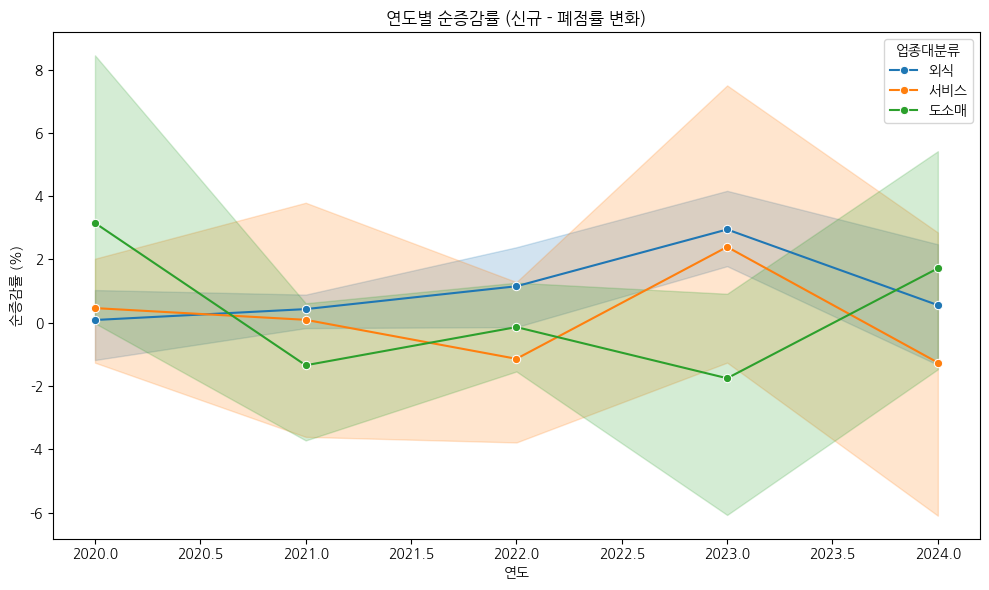

In [17]:
# 전년대비 순증감률 (성장성)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="기준연도", y="전년대비순증감률", hue="업종대분류", marker="o")
plt.title("연도별 순증감률 (신규 - 폐점률 변화)")
plt.ylabel("순증감률 (%)")
plt.xlabel("연도")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()

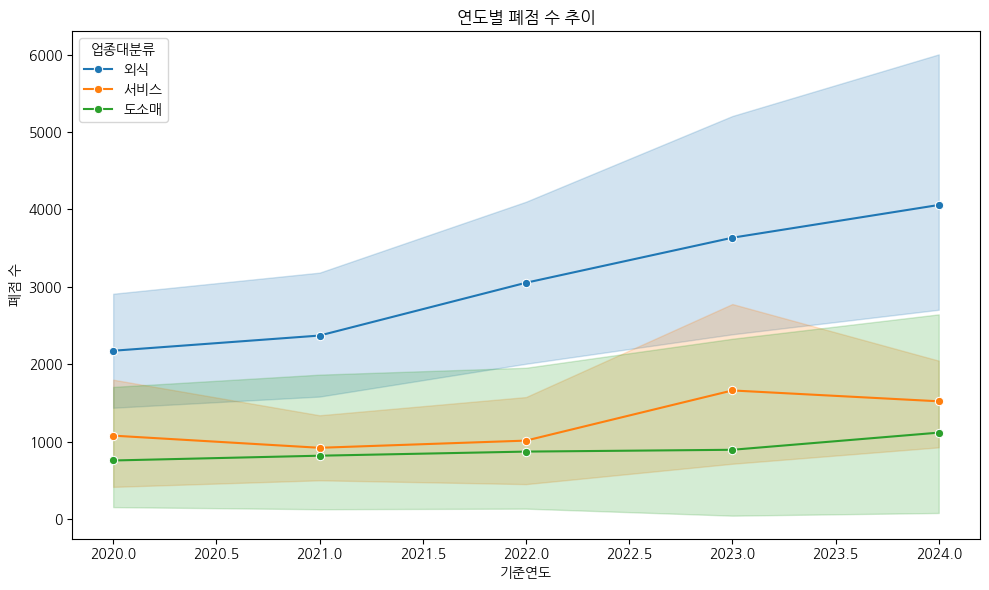

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="기준연도", y="폐점수", hue="업종대분류", marker="o")
plt.title("연도별 폐점 수 추이")
plt.ylabel("폐점 수")
plt.xlabel("기준연도")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()

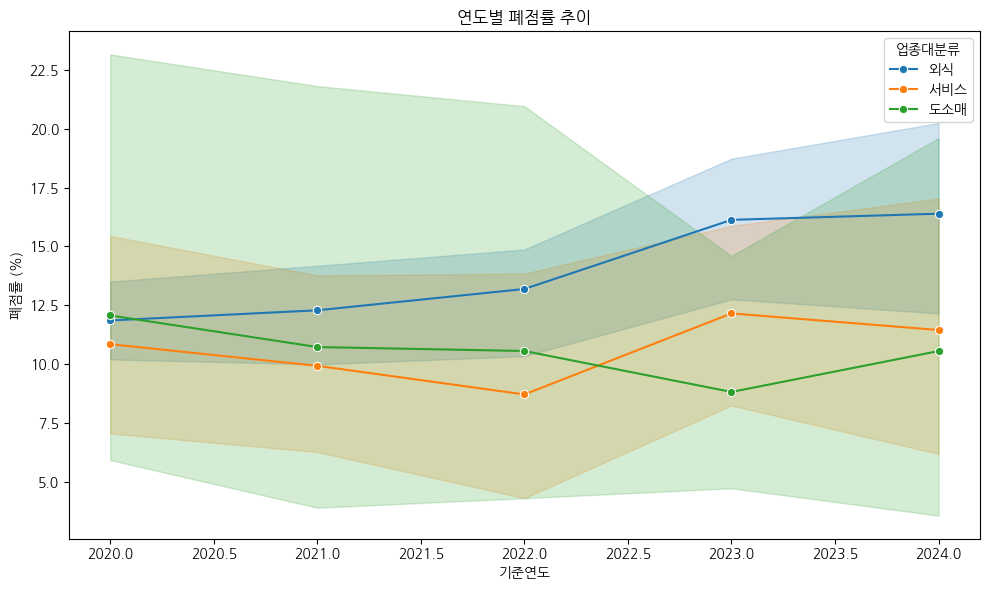

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="기준연도", y="폐점률", hue="업종대분류", marker="o")
plt.title("연도별 폐점률 추이")
plt.ylabel("폐점률 (%)")
plt.xlabel("기준연도")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()


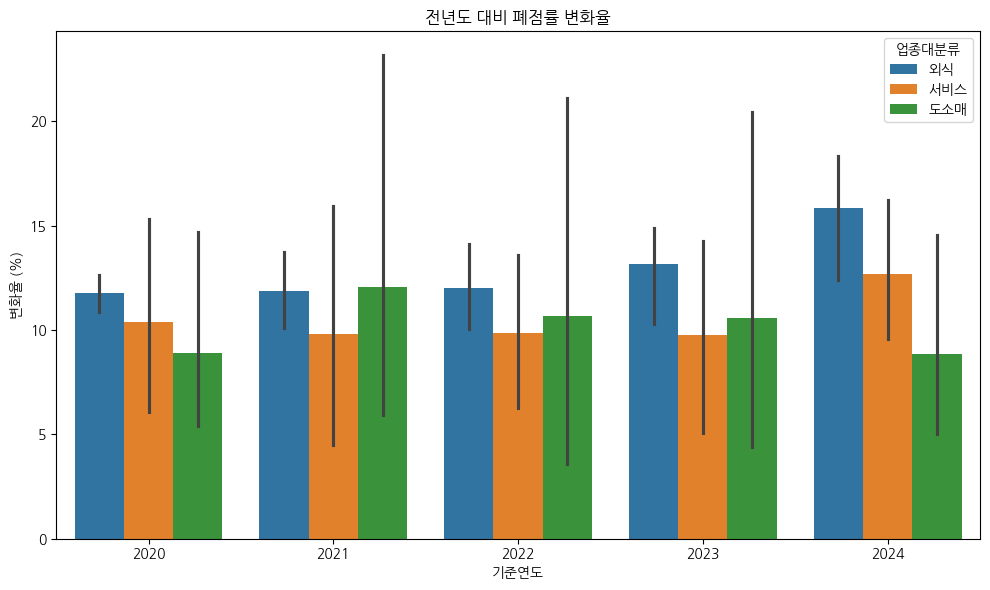

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x="기준연도", y="전년대비폐점률", hue="업종대분류")
plt.title("전년도 대비 폐점률 변화율")
plt.ylabel("변화율 (%)")
plt.xlabel("기준연도")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()


In [21]:
summary = (
    combined_df.groupby(["기준연도", "업종대분류"])["전년대비폐점률"]
    .mean()
    .reset_index()
    .sort_values(["기준연도", "전년대비폐점률"], ascending=[True, False])
)

for year in summary["기준연도"].unique():
    temp = summary[summary["기준연도"] == year]
    print(f"📌 {year}년 전년대비 폐점률 변화:")
    for _, row in temp.iterrows():
        direction = "증가" if row["전년대비폐점률"] > 0 else "감소"
        print(f"  - {row['업종대분류']}: {abs(row['전년대비폐점률']):.2f}% {direction}")
    print()


📌 2020년 전년대비 폐점률 변화:
  - 외식: 11.76% 증가
  - 서비스: 10.37% 증가
  - 도소매: 8.91% 증가

📌 2021년 전년대비 폐점률 변화:
  - 도소매: 12.06% 증가
  - 외식: 11.85% 증가
  - 서비스: 9.83% 증가

📌 2022년 전년대비 폐점률 변화:
  - 외식: 12.04% 증가
  - 도소매: 10.69% 증가
  - 서비스: 9.84% 증가

📌 2023년 전년대비 폐점률 변화:
  - 외식: 13.18% 증가
  - 도소매: 10.57% 증가
  - 서비스: 9.75% 증가

📌 2024년 전년대비 폐점률 변화:
  - 외식: 15.83% 증가
  - 서비스: 12.70% 증가
  - 도소매: 8.83% 증가



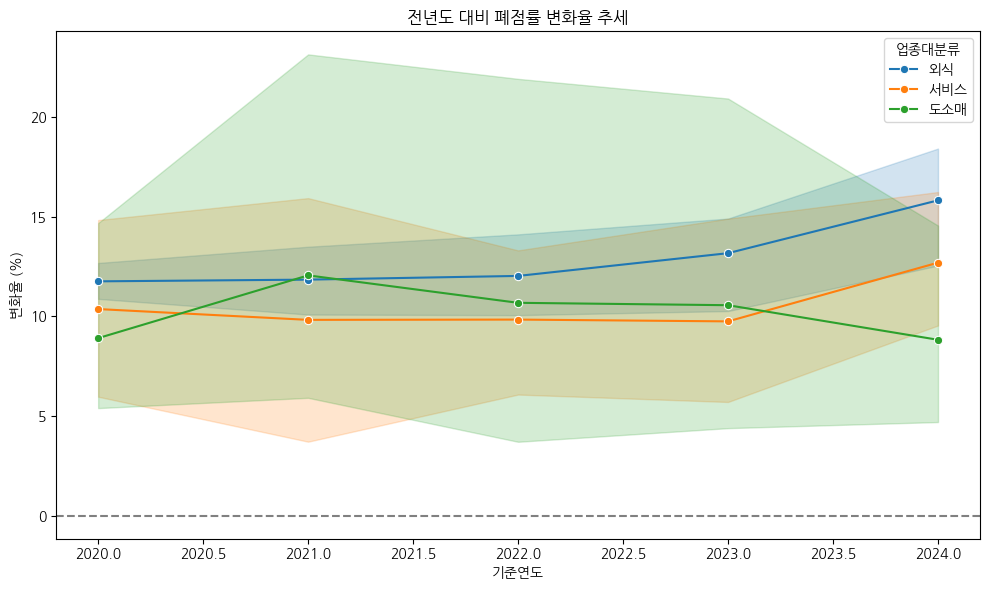

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=combined_df,
    x="기준연도",
    y="전년대비폐점률",
    hue="업종대분류",
    marker="o"
)
plt.title("전년도 대비 폐점률 변화율 추세")
plt.ylabel("변화율 (%)")
plt.xlabel("기준연도")
plt.axhline(0, color="gray", linestyle="--")
plt.legend(title="업종대분류")
plt.tight_layout()
plt.show()


In [23]:
pivot_df = combined_df.pivot_table(
    index="기준연도", columns="업종대분류", values="전년대비폐점률", aggfunc="mean"
).round(2)

import pandas as pd
from IPython.display import display

display(pivot_df)


업종대분류,도소매,서비스,외식
기준연도,,,
2020,8.91,10.37,11.76
2021,12.06,9.83,11.85
2022,10.69,9.84,12.04
2023,10.57,9.75,13.18
2024,8.83,12.70,15.83


- yr :	기준 연도
- indutyLclasNm	: 업종 대분류명 (예: 서비스, 도소매, 외식)
- indutyMlsfcNm :	업종 중분류명 (예: 교육 (외국어), 교육 (교과))
- allFrcsCnt : 전체 가맹점 수
- newFrcsRgsCnt	: 신규 가맹점 등록 수
- newFrcsRt	: 신규 가맹점 등록률 (%)
- bfyrNewFrcsRt	: 전년도 신규 가맹점 등록률 (%)
- bfyrVersusNewDffrncRt	: 전년도 대비 신규 등록률 증감 (%)
- endCncltnFrcsCnt	: 가맹점 폐점 수 (계약 종료 또는 철회 포함)
- endCncltnRt	: 폐점률 (%)
- bfyrVersusEndCncltnRt	: 전년도 대비 폐점률 (%)
- bfyrVersusDffrncRt	; 전년도 대비 순증감률 (%) (신규등록률 - 폐점률의 변화 차이)

### 창업자에게 어떤 정보를 전달 할 건지
- 업종별 폐점률: 선택한 업종이 얼마나 자주 폐점되는지(위험 지표) -> 한식 업종은 최근 3년간 폐점률이 상승하고 있어요. 리스크 관리가 필요하다.

- 연도별 비교 :  업종 경기 흐름 파악 -> 한식 업종은 2023년에 폐점률이 급증했으니 최근 시장 상황 확인이 필요

- 업종별 신규등록률: 신규 가맹점이 얼마나 활발히 생기고 있는지 (시장 성장성)

- 업종별 순증감률: 신규 등록 수 - 폐점 수로 시장이 성장 중인지, 축소 중인지 판단


In [24]:
combined_df.head()

,기준연도,업종대분류,업종중분류,전체가맹점수,신규가맹점등록수,신규가맹점등록률,전년도신규가맹점등록률,전년대비신규등록률증감,폐점수,폐점률,전년대비폐점률,전년대비순증감률,업종
0,2020,외식,치킨,25255,4194,16.61,15.60,1.00,2845,11.27,11.60,-0.33,외식
1,2020,외식,한식,24130,7095,29.40,24.60,4.80,3237,13.41,12.45,0.97,외식
2,2020,외식,기타 외식,16257,4440,27.31,23.79,3.52,2392,14.71,13.36,1.35,외식
3,2020,외식,커피,15770,3279,20.79,20.67,0.13,1356,8.60,10.90,-2.30,외식
4,2020,외식,분식,9281,2451,26.41,21.00,5.41,1045,11.26,10.51,0.75,외식


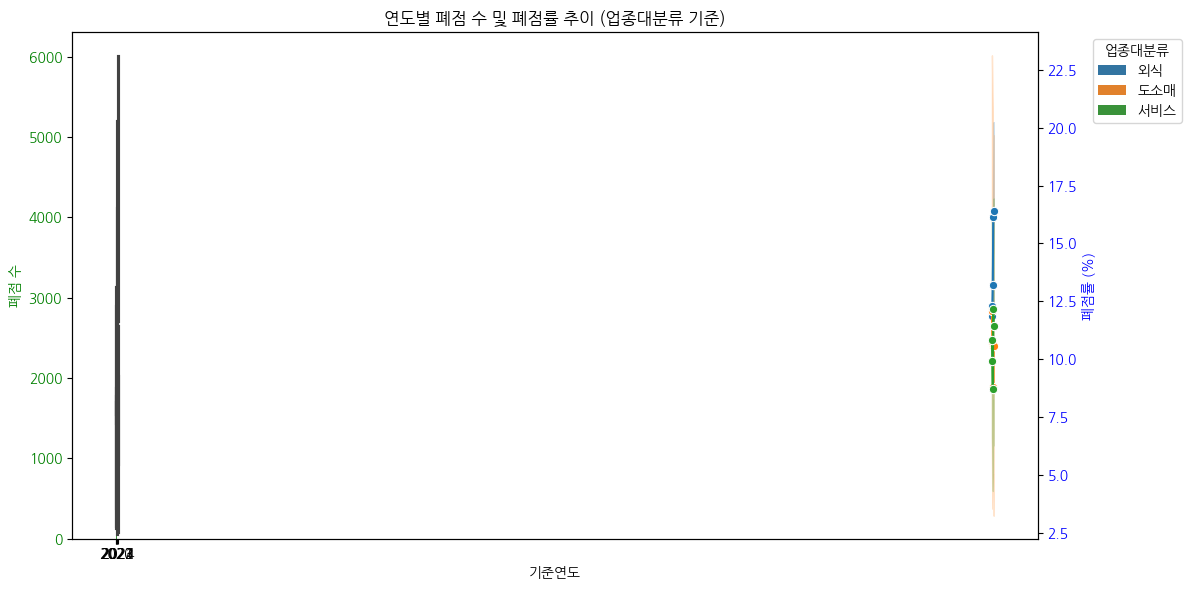

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기준연도를 오름차순 정렬하고 정수형으로 변환
combined_df["기준연도"] = combined_df["기준연도"].astype(int)
combined_df = combined_df.sort_values("기준연도")

plt.figure(figsize=(12, 6))
ax1 = plt.gca()

# 막대그래프 (좌측 Y축): 폐점 수
sns.barplot(data=combined_df, x="기준연도", y="폐점수", hue="업종대분류", ax=ax1)
ax1.set_ylabel("폐점 수", color="green")
ax1.tick_params(axis='y', labelcolor="green")

# 선그래프 (우측 Y축): 폐점률
ax2 = ax1.twinx()
sns.lineplot(data=combined_df, x="기준연도", y="폐점률", hue="업종대분류", marker="o", ax=ax2, legend=False)
ax2.set_ylabel("폐점률 (%)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# 시각화 마무리
ax1.set_xlabel("기준연도")
plt.title("연도별 폐점 수 및 폐점률 추이 (업종대분류 기준)")
ax1.legend(title="업종대분류", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [26]:
combined_df.head()

,기준연도,업종대분류,업종중분류,전체가맹점수,신규가맹점등록수,신규가맹점등록률,전년도신규가맹점등록률,전년대비신규등록률증감,폐점수,폐점률,전년대비폐점률,전년대비순증감률,업종
0,2020,외식,치킨,25255,4194,16.61,15.60,1.00,2845,11.27,11.60,-0.33,외식
52,2020,도소매,화장품,1870,44,2.35,3.90,-1.55,638,34.12,20.40,13.72,업종
51,2020,도소매,기타도소매,6518,688,10.56,12.11,-1.56,507,7.78,7.60,0.18,업종
50,2020,도소매,편의점,45555,5610,12.31,12.39,-0.07,2508,5.51,6.12,-0.61,업종
25,2020,서비스,교육 (외국어),17552,2657,15.14,18.56,-3.42,1915,10.91,13.61,-2.70,서비스


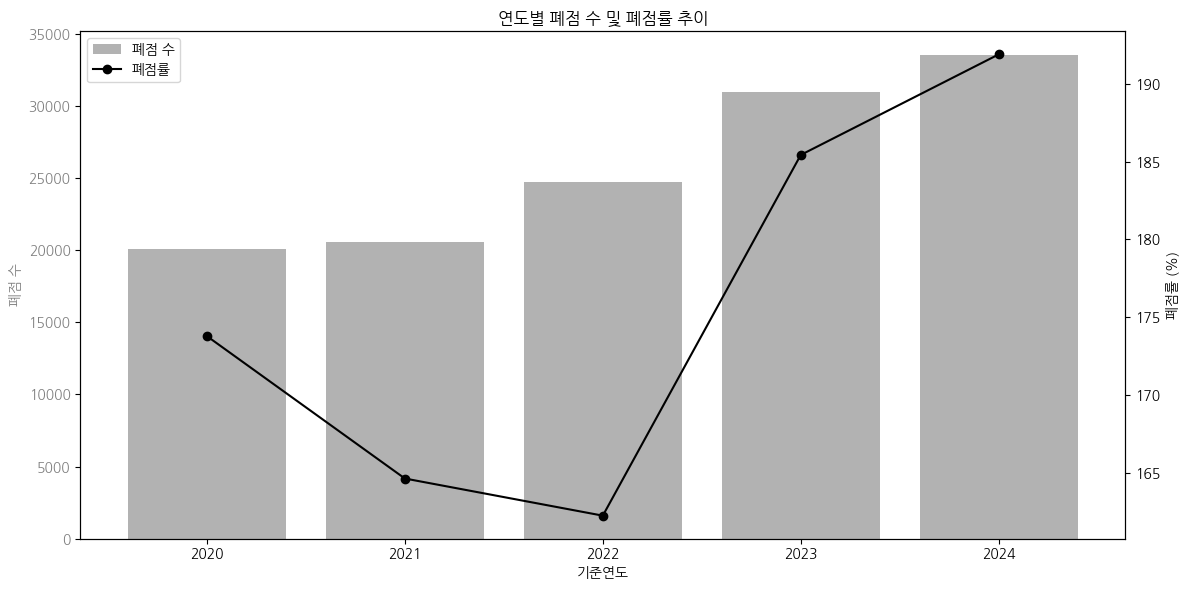

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도 정수형 변환
combined_df["기준연도"] = combined_df["기준연도"].astype(int)

# 필요한 컬럼만 추출
plot_df = combined_df.groupby("기준연도")[["폐점수", "폐점률"]].sum().reset_index()

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# ① 막대그래프: 폐점 수 (좌측 y축)
bar = ax1.bar(plot_df["기준연도"], plot_df["폐점수"], color="gray", alpha=0.6, label="폐점 수")
ax1.set_ylabel("폐점 수", color="gray")
ax1.tick_params(axis='y', labelcolor="gray")

# ② 선그래프: 폐점률 (우측 y축)
ax2 = ax1.twinx()
line = ax2.plot(plot_df["기준연도"], plot_df["폐점률"], color="black", marker="o", label="폐점률")
ax2.set_ylabel("폐점률 (%)", color="black")
ax2.tick_params(axis='y', labelcolor="black")

# 타이틀 및 x축 설정
plt.title("연도별 폐점 수 및 폐점률 추이")
ax1.set_xlabel("기준연도")

# 범례 설정
lines_labels = [bar, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc="upper left")

plt.tight_layout()
plt.show()


### 외식 업종

In [4]:
df=dfs["외식"].copy()   
df.head()

,yr,indutyLclasNm,indutyMlsfcNm,allFrcsCnt,newFrcsRgsCnt,newFrcsRt,bfyrNewFrcsRt,bfyrVersusNewDffrncRt,endCncltnFrcsCnt,endCncltnRt,bfyrVersusEndCncltnRt,bfyrVersusDffrncRt
0,2020,외식,치킨,25255,4194,16.61,15.60,1.00,2845,11.27,11.60,-0.33
1,2020,외식,한식,24130,7095,29.40,24.60,4.80,3237,13.41,12.45,0.97
2,2020,외식,기타 외식,16257,4440,27.31,23.79,3.52,2392,14.71,13.36,1.35
3,2020,외식,커피,15770,3279,20.79,20.67,0.13,1356,8.60,10.90,-2.30
4,2020,외식,분식,9281,2451,26.41,21.00,5.41,1045,11.26,10.51,0.75


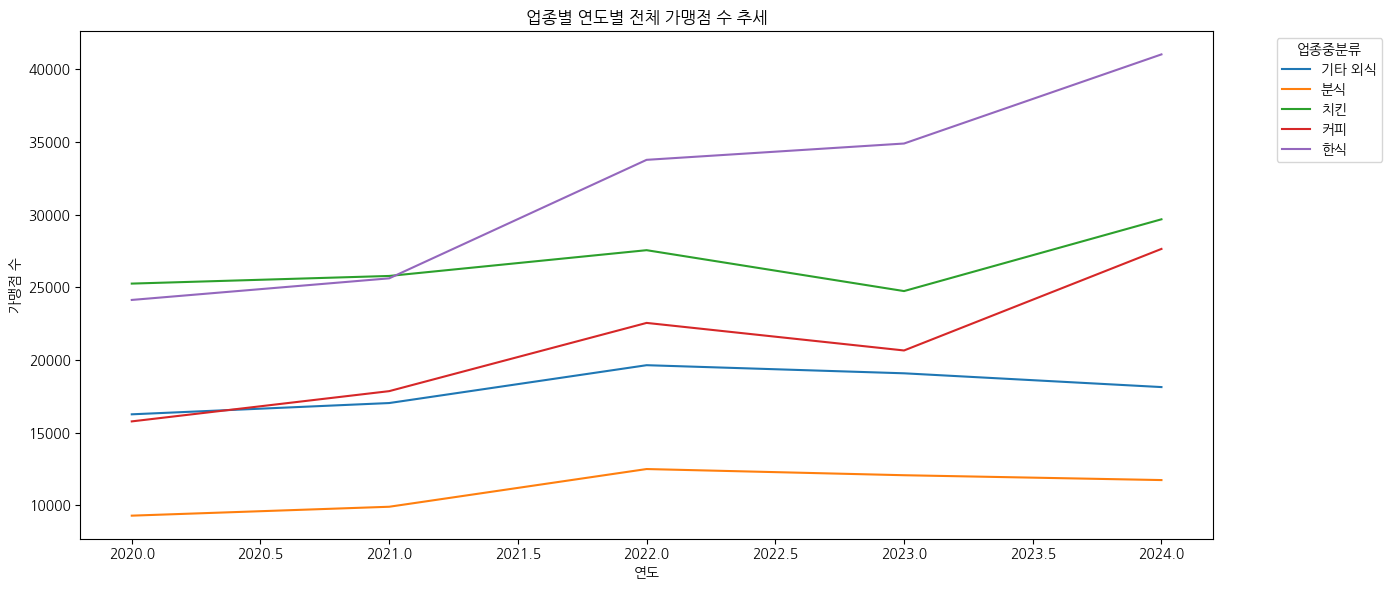

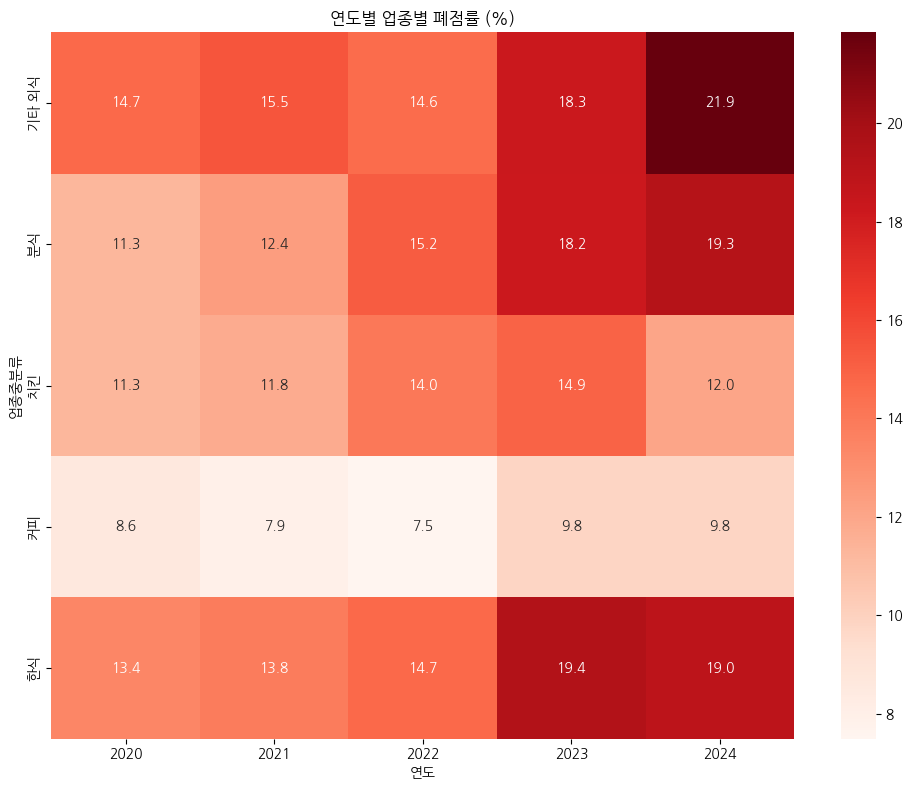

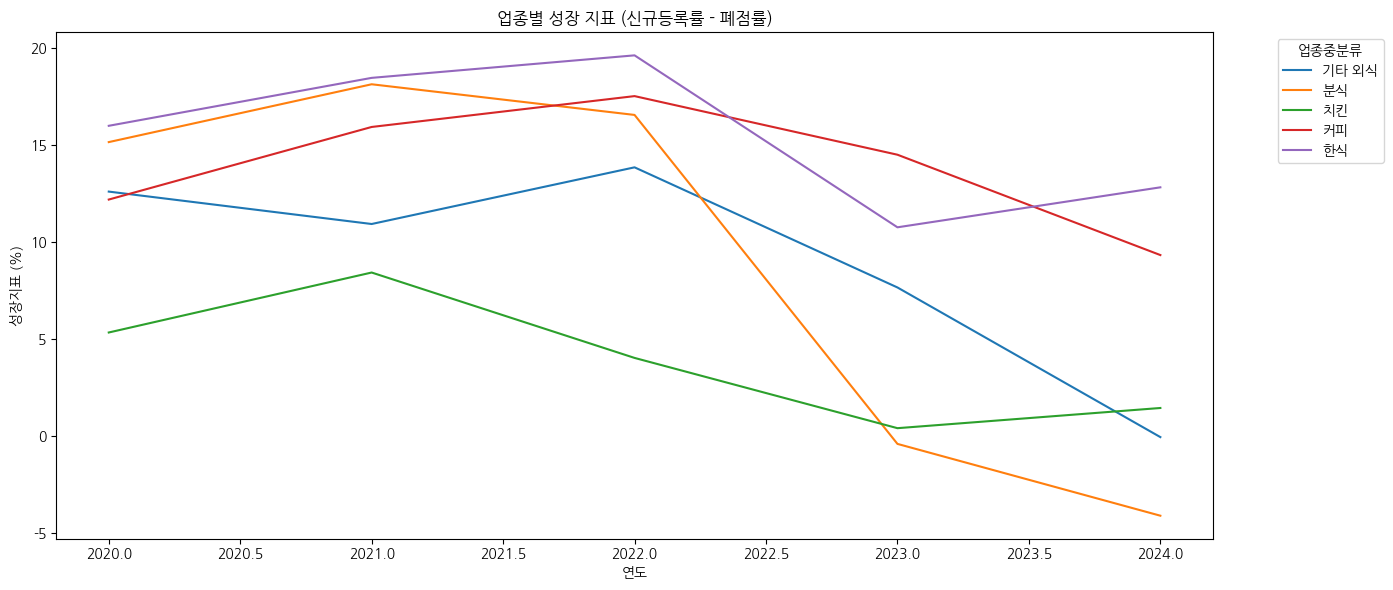

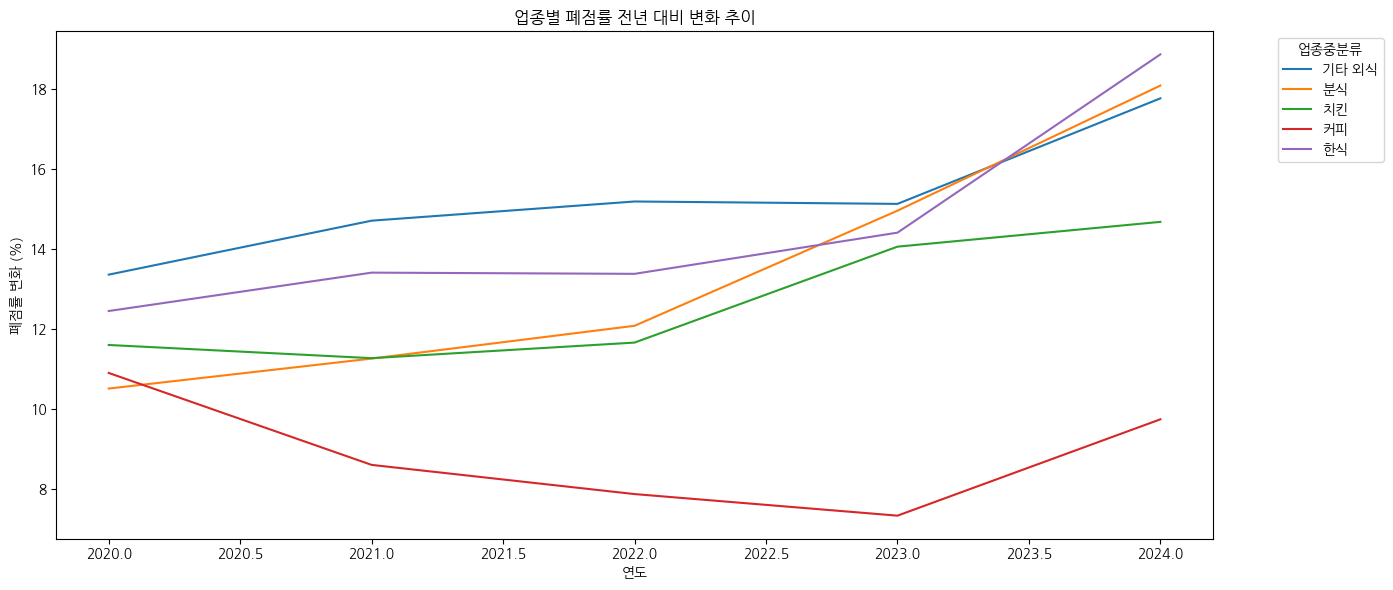

In [9]:
# 1. 업종별 연도별 가맹점 수 추세
pivot_total = df.pivot_table(index="yr", columns="indutyMlsfcNm", values="allFrcsCnt", aggfunc="sum")
pivot_total.plot(figsize=(14, 6), title="업종별 연도별 전체 가맹점 수 추세")
plt.ylabel("가맹점 수")
plt.xlabel("연도")
plt.legend(title="업종중분류", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. 연도별 업종별 폐점률 시각화 (heatmap)
pivot_closure = df.pivot_table(index="indutyMlsfcNm", columns="yr", values="endCncltnRt")
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_closure, annot=True, cmap="Reds", fmt=".1f")
plt.title("연도별 업종별 폐점률 (%)")
plt.xlabel("연도")
plt.ylabel("업종중분류")
plt.tight_layout()
plt.show()

# 3. 업종별 신규등록률 - 폐점률 → 성장 가능성 지표
df["growth_indicator"] = df["newFrcsRt"] - df["endCncltnRt"]
pivot_growth = df.pivot_table(index="yr", columns="indutyMlsfcNm", values="growth_indicator", aggfunc="mean")
pivot_growth.plot(figsize=(14, 6), title="업종별 성장 지표 (신규등록률 - 폐점률)")
plt.ylabel("성장지표 (%)")
plt.xlabel("연도")
plt.legend(title="업종중분류", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. 업종별 전년 대비 폐점률 변화 추이
pivot_closure_change = df.pivot_table(index="yr", columns="indutyMlsfcNm", values="bfyrVersusEndCncltnRt", aggfunc="mean")
pivot_closure_change.plot(figsize=(14, 6), title="업종별 폐점률 전년 대비 변화 추이")
plt.ylabel("폐점률 변화 (%)")
plt.xlabel("연도")
plt.legend(title="업종중분류", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 서비스 업종

In [10]:
df=dfs["서비스"].copy()   
df.head()

,yr,indutyLclasNm,indutyMlsfcNm,allFrcsCnt,newFrcsRgsCnt,newFrcsRt,bfyrNewFrcsRt,bfyrVersusNewDffrncRt,endCncltnFrcsCnt,endCncltnRt,bfyrVersusEndCncltnRt,bfyrVersusDffrncRt
0,2020,서비스,교육 (외국어),17552,2657,15.14,18.56,-3.42,1915,10.91,13.61,-2.70
1,2020,서비스,교육 (교과),10730,2451,22.84,21.74,1.10,2196,20.47,19.12,1.34
2,2020,서비스,기타 교육,6396,1068,16.70,16.19,0.51,658,10.29,8.40,1.88
3,2020,서비스,자동차 관련,5258,562,10.69,7.22,3.47,402,7.65,5.14,2.51
4,2020,서비스,세탁,4520,502,11.11,14.31,-3.20,221,4.89,5.59,-0.71


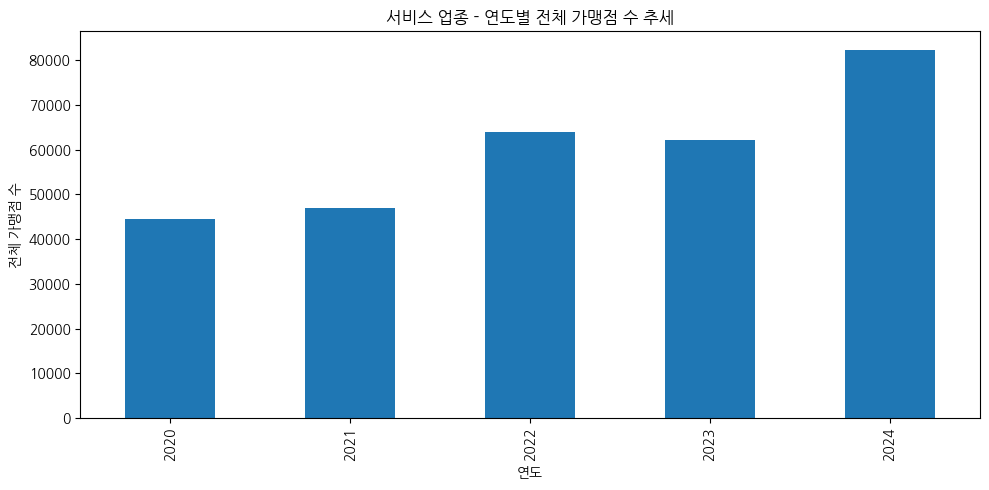

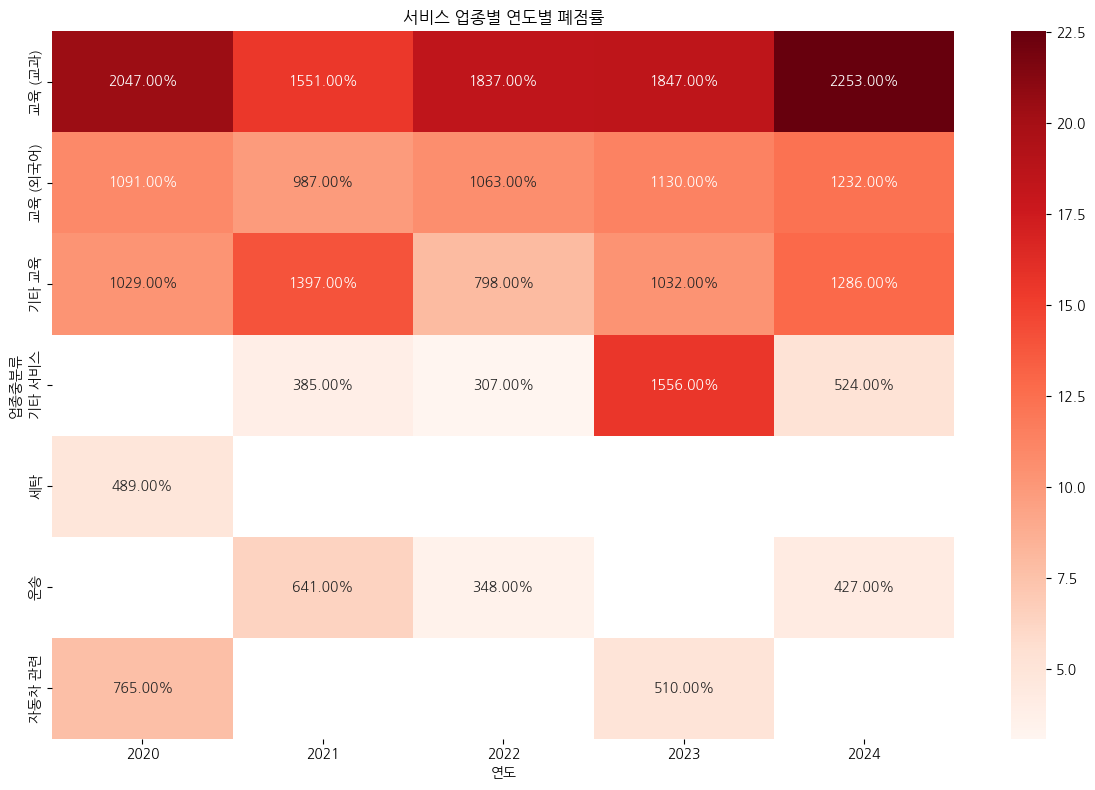

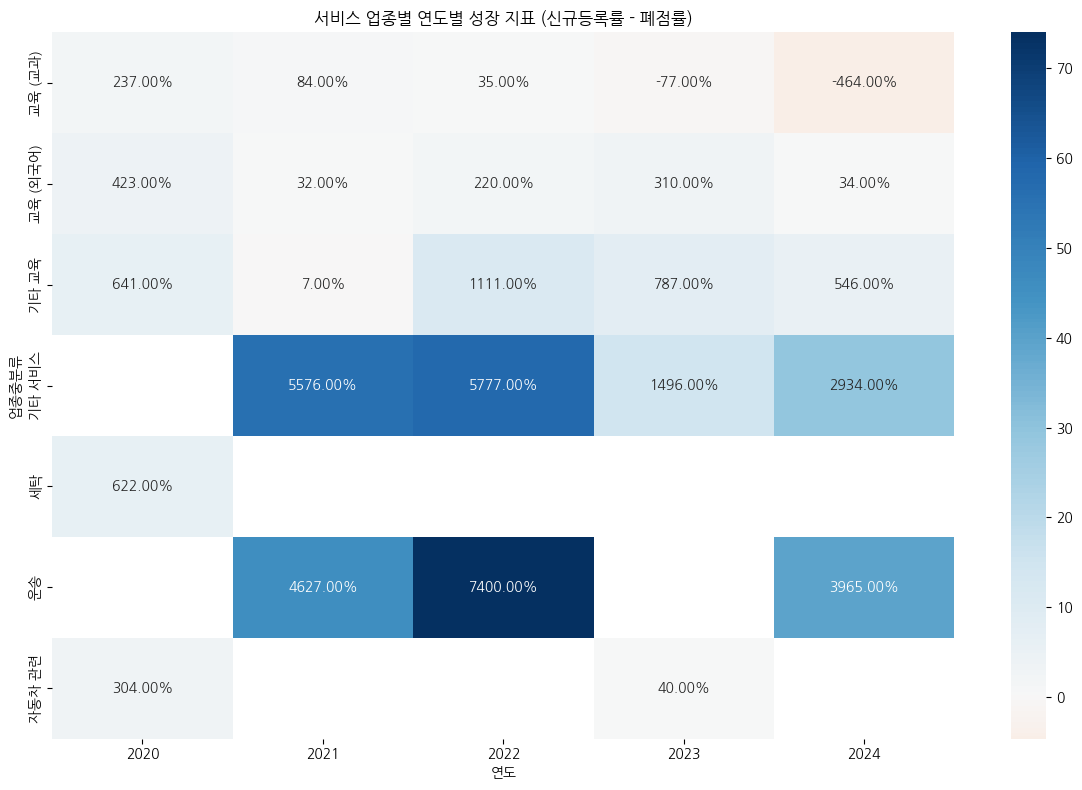

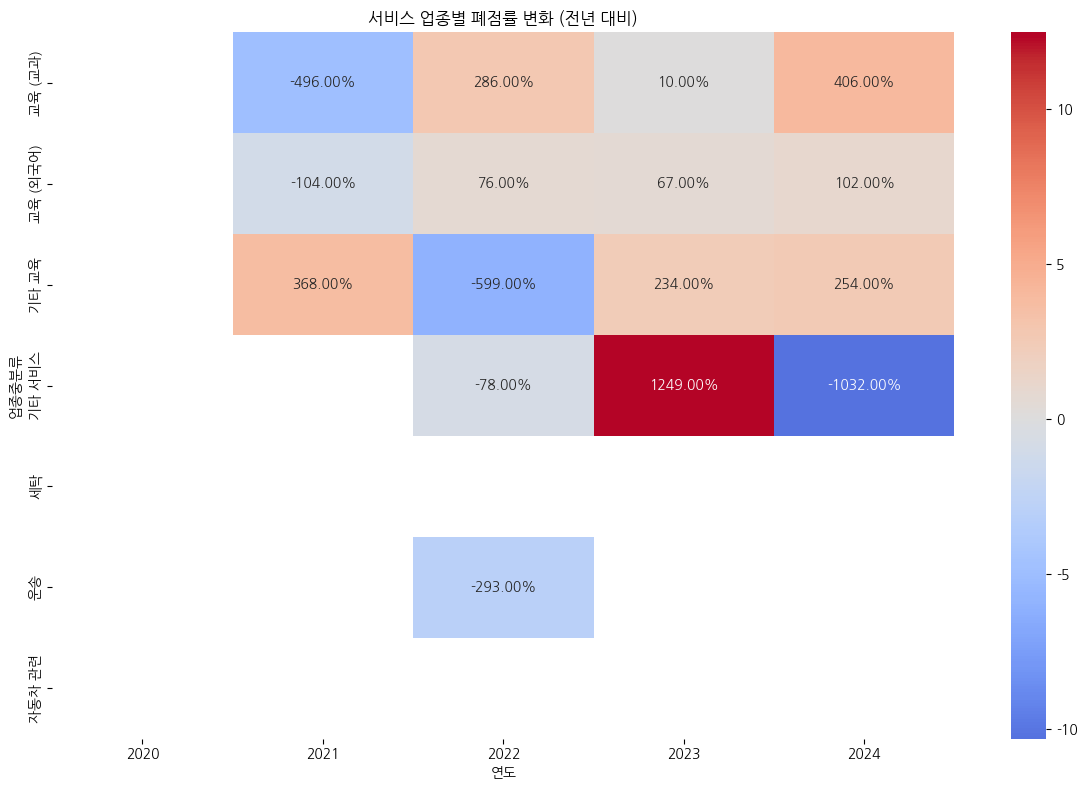

In [11]:
# 컬럼명 한글로 정리
df_service = df.rename(columns={
    "yr": "연도",
    "indutyLclasNm": "업종대분류",
    "indutyMlsfcNm": "업종중분류",
    "allFrcsCnt": "전체가맹점수",
    "newFrcsRgsCnt": "신규가맹점등록수",
    "newFrcsRt": "신규등록률",
    "endCncltnFrcsCnt": "폐점수",
    "endCncltnRt": "폐점률",
    "bfyrVersusDffrncRt": "순증감률"
})

# 연도 타입 변경
df_service["연도"] = df_service["연도"].astype(int)

# 연도별 전체 가맹점 수 추세
total_by_year_service = df_service.groupby("연도")["전체가맹점수"].sum()

# 업종별 폐점률 피벗
pivot_closure_service = df_service.pivot(index="업종중분류", columns="연도", values="폐점률")

# 성장지표 = 신규등록률 - 폐점률
df_service["성장지표"] = df_service["신규등록률"] - df_service["폐점률"]
pivot_growth_service = df_service.pivot(index="업종중분류", columns="연도", values="성장지표")

# 폐점률 변화량
pivot_closure_diff_service = pivot_closure_service.diff(axis=1)

# 시각화
plt.figure(figsize=(10, 5))
total_by_year_service.plot(kind="bar", title="서비스 업종 - 연도별 전체 가맹점 수 추세")
plt.ylabel("전체 가맹점 수")
plt.tight_layout()
plt.show()

# 폐점률 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_closure_service, annot=True, fmt=".2%", cmap="Reds")
plt.title("서비스 업종별 연도별 폐점률")
plt.tight_layout()
plt.show()

# 성장지표 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_growth_service, annot=True, fmt=".2%", cmap="RdBu", center=0)
plt.title("서비스 업종별 연도별 성장 지표 (신규등록률 - 폐점률)")
plt.tight_layout()
plt.show()

# 폐점률 변화량 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_closure_diff_service, annot=True, fmt=".2%", cmap="coolwarm", center=0)
plt.title("서비스 업종별 폐점률 변화 (전년 대비)")
plt.tight_layout()
plt.show()


/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_5931/4218114023.py:45: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_5931/4218114023.py:45: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_5931/4218114023.py:45: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_5931/4218114023.py:45: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_5931/4218114023.py:45: UserWarning: Glyph 54224 (\N{HANGUL SYLLABLE PYE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_5931/4218114023.py:45: UserWarni

<Figure size 1200x600 with 0 Axes>

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54224 (\N{HANGUL SYLLABLE PY

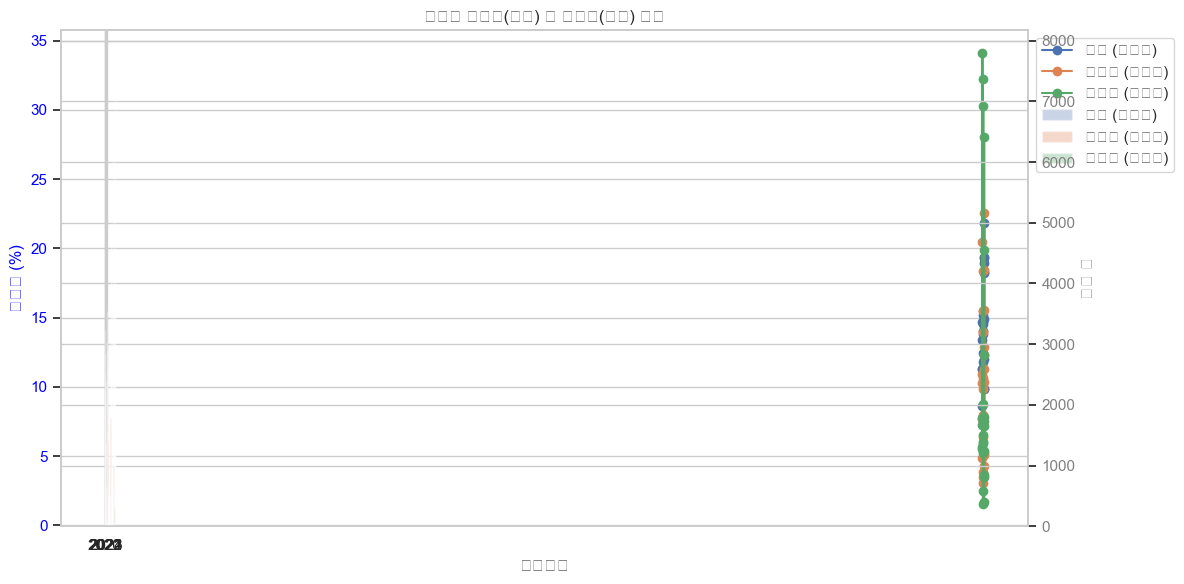

In [32]:
import matplotlib.pyplot as plt

# 기본 설정
plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots(figsize=(12, 6))

# 폐점률 라인플롯 (왼쪽 y축)
for 업종 in combined_df["업종대분류"].unique():
    df_sub = combined_df[combined_df["업종대분류"] == 업종]
    ax1.plot(df_sub["기준연도"], df_sub["폐점률"], marker='o', label=f"{업종} (폐점률)")

ax1.set_xlabel("기준연도")
ax1.set_ylabel("폐점률 (%)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# 폐점수 막대그래프 (오른쪽 y축)
ax2 = ax1.twinx()

bar_width = 0.2
years = sorted(combined_df["기준연도"].unique())

# 막대그래프는 업종별로 약간의 간격을 둠
for i, 업종 in enumerate(combined_df["업종대분류"].unique()):
    df_sub = combined_df[combined_df["업종대분류"] == 업종]
    ax2.bar([x + i*bar_width for x in range(len(df_sub))],
            df_sub["폐점수"],
            width=bar_width,
            alpha=0.3,
            label=f"{업종} (폐점수)")

ax2.set_ylabel("폐점 수", color="gray")
ax2.tick_params(axis='y', labelcolor="gray")

# x축 라벨 정렬
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years)

# 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.title("연도별 폐점률(라인) 및 폐점수(막대) 추이")
plt.tight_layout()
plt.show()
